# **Retail Sales Data EDA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [ ]:
# Calculate Rating mean and standard deviation
rating_mean = retail.rating.mean()
rating_std = retail.rating.std()
print('Mean: ' + str(rating_mean))
print('STD: ' + str(rating_std))

Mean: 3.8208963763509174
STD: 0.5153735990855995


Skew: -0.530912194657049
Kurt: 2.735180423524434


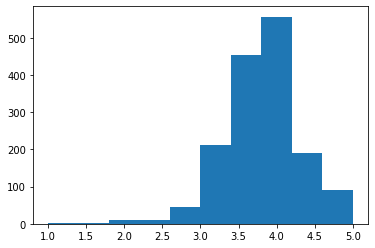

In [ ]:
# Examine Parametric Assumption
print('Skew: ' + str(retail.rating.skew()))
print('Kurt: ' + str(retail.rating.kurt()))
plt.hist(retail.rating)

1.0
5.81
8.0
11.0
49.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


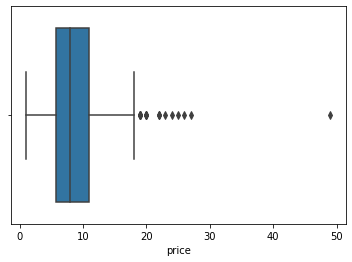

In [ ]:
# Calculate Price Portion
price_min = retail.price.min()
price_q1 = retail.price.quantile(0.25)
price_median = retail.price.median()
price_q3 = retail.price.quantile(0.75)
price_max = retail.price.max()

print(price_min)
print(price_q1)
print(price_median)
print(price_q3)
print(price_max)

sns.boxplot(retail.price)

# **Univariate Plots & Distribution**

Text(0.5, 1.0, 'Distribution of Ratings')

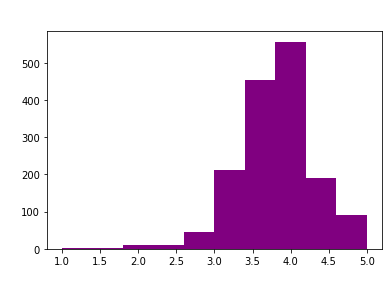

In [ ]:
# Ratings Histogram
plt.hist(retail.rating, color = 'purple')
plt.xlabel('Ratings', color = 'white')
plt.ylabel('Counts', color = 'white')
plt.title('Distribution of Ratings', pad = 10, color = 'white', size = 20)

Text(0.5, 1.0, 'Retail Price 5-figure Summary')

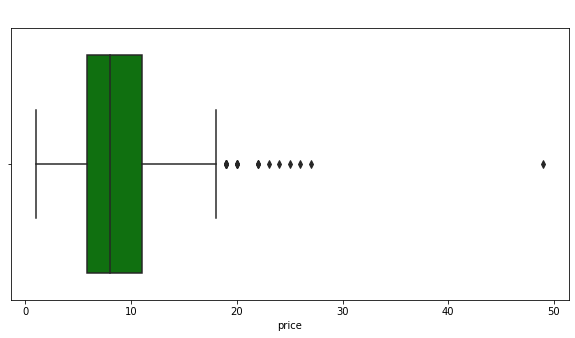

In [ ]:
# Price Boxplot
plt.figure(figsize=(10,5))
ax = sns.boxplot(x = retail.price, color = 'green')
ax.set_title('Retail Price 5-figure Summary', color = 'white', size = 20)

# **Correlations**

In [ ]:
# Find R and p-value for price and retail price
# Find slope and intercept for the regression line
m, b, corr, p_value, error = stats.linregress(retail.price, retail.retail_price)


print(m)
print(b)
print(corr)
print(p_value)
print(error)

2.3528524718272195
3.700248614698271
0.30474760499855424
3.6828783885726557e-35
0.18552430110339174


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


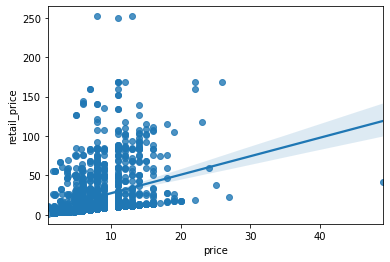

In [ ]:
# Visualize the relationship with a regression line
sns.regplot(retail.price, retail.retail_price)

# **Ad Boost t-Test**
Examine whether increasing the size of the audience that sees a product via "Ad Boosts" results in more sales. Did ad-boosted items sell more units (`units_sold`).

In [ ]:
boosted = retail.loc[retail.uses_ad_boosts == 1, 'units_sold']
not_boosted = retail.loc[retail.uses_ad_boosts == 0, 'units_sold']

print(boosted)
print(not_boosted)

1       20000
3        5000
4         100
8         100
11        100
        ...  
1566      100
1567    20000
1568    10000
1569      100
1572      100
Name: units_sold, Length: 681, dtype: int64
0         100
2         100
5          10
6       50000
7        1000
        ...  
1562      100
1563      100
1564     1000
1570      100
1571      100
Name: units_sold, Length: 892, dtype: int64


(array([822.,  54.,   0.,   0.,  13.,   0.,   0.,   0.,   0.,   3.]),
 array([1.00000e+00, 1.00009e+04, 2.00008e+04, 3.00007e+04, 4.00006e+04,
        5.00005e+04, 6.00004e+04, 7.00003e+04, 8.00002e+04, 9.00001e+04,
        1.00000e+05]),
 <a list of 10 Patch objects>)

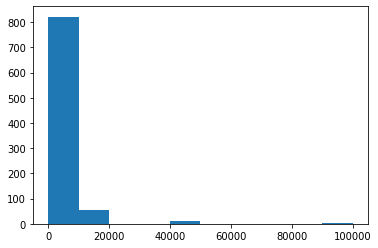

In [ ]:
plt.hist(not_boosted)

(array([625.,  49.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,   3.]),
 array([1.0000e+01, 1.0009e+04, 2.0008e+04, 3.0007e+04, 4.0006e+04,
        5.0005e+04, 6.0004e+04, 7.0003e+04, 8.0002e+04, 9.0001e+04,
        1.0000e+05]),
 <a list of 10 Patch objects>)

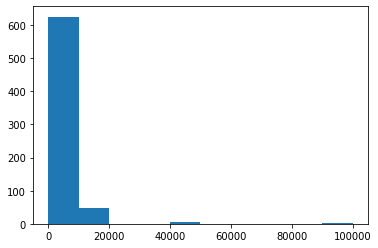

In [ ]:
plt.hist(boosted)

In [ ]:
boosted_df = pd.DataFrame(boosted)

In [ ]:
not_boosted_df = pd.DataFrame(not_boosted)

In [ ]:
pd.DataFrame.describe(boosted_df)

,units_sold
count,681.000000
mean,4167.136564
std,9182.698142
min,10.000000
25%,100.000000
50%,1000.000000
75%,5000.000000
max,100000.000000


In [ ]:
pd.DataFrame.describe(not_boosted_df)

,units_sold
count,892.000000
mean,4470.218610
std,9490.149242
min,1.000000
25%,100.000000
50%,1000.000000
75%,5000.000000
max,100000.000000


In [ ]:
ad_test_stat, ad_p_value = stats.ttest_ind(boosted, not_boosted)

print(ad_test_stat)
print(ad_p_value)

-0.6364354869040417
0.5245853312335857
